In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from io import StringIO

In [2]:
x_source =numpy.loadtxt('NACA0012_x.txt')
y_source =numpy.loadtxt('NACA0012_y.txt')
sigma_source =numpy.loadtxt('NACA0012_sigma.txt')
numpy.shape(x_source)

(100,)

In [3]:
N = 51                                # Number of points in each direction
x_start, x_end = -1.0, 2.0            # x-direction boundaries
y_start, y_end = -0.5, 0.5            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # creates a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # creates a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

In [4]:
u_inf = 1.0
alpha=0.0
u_freestream = u_inf*numpy.cos(alpha) * numpy.ones((N, N), dtype=float)
v_freestream = u_inf*numpy.sin(alpha) * numpy.ones((N, N), dtype=float)

psi_freestream = u_inf * Y

In [5]:
def get_velocity(sigma, xs, ys, X, Y):
    """Returns the velocity field generated by a source/sink.
    
    Arguments
    ---------
    strength -- strength of the source/sink.
    xs, ys -- coordinates of the source/sink.
    X, Y -- mesh grid.
    """
    u = sigma/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = sigma/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

In [6]:
def get_stream_function(sigma, xs, ys, X, Y):
    """Returns the stream-function generated by a source/sink.
    
    Arguments
    ---------
    strength -- strength of the source/sink.
    xs, ys -- coordinates of the source/sink.
    X, Y -- mesh grid.
    """
    psi = sigma/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    
    return psi

In [7]:
u_source =numpy.zeros((N,N))
v_source =numpy.zeros((N,N))
psi_source=numpy.zeros((N,N))

u_all_sources=numpy.zeros((N,N))
v_all_sources=numpy.zeros((N,N))
psi_all_sources=numpy.zeros((N,N))

for i in range (0,99):
    u_source, v_source= get_velocity(sigma_source[i], x_source[i], y_source[i], X, Y)
    psi_source= get_stream_function(sigma_source[i], x_source[i], y_source[i], X, Y)
    
    u_all_sources=u_all_sources+u_source
    v_all_sources=v_all_sources+v_source
    psi_all_sources=psi_all_sources+psi_source
    

In [8]:
u_tot=u_all_sources+u_freestream 
v_tot=v_all_sources+v_freestream
psi_tot=psi_all_sources+v_freestream

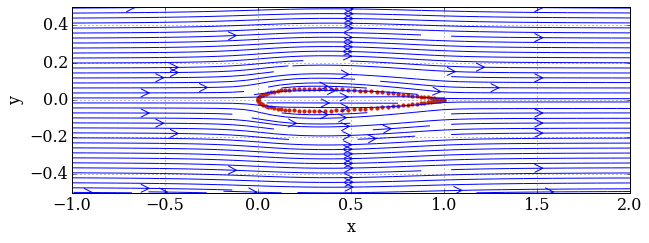

In [23]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(x_source ,y_source, color='#CD2305', s=10, marker='o')
pyplot.streamplot(X, Y, u_tot, v_tot, density=1.3, linewidth=1, arrowsize=2, arrowstyle='->')


In [22]:
# computes the pressure coefficient field
cp = 1.0 - (u_tot**2+v_tot**2)/u_inf**2
numpy.argmax(cp)

1291

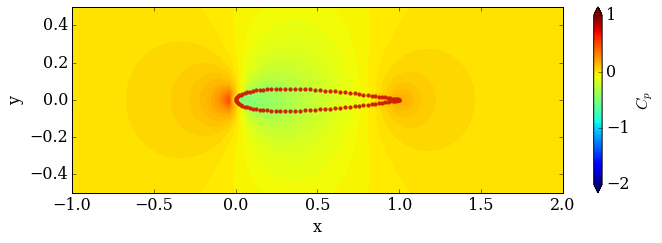

In [21]:

# plots the pressure coefficient field
size = 10
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x_source ,y_source, color='#CD2305', s=10, marker='o')